<a href="https://pandas.pydata.org/">
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Pandas_logo.svg/2560px-Pandas_logo.svg.png" width="300px">
</a>


# Data Wrangling with pandas



## Objectives
This is the demonstration notebook for the first task. The facilitators will present a lecture that is based around this notebook. Before performing the first task as a team, we recommend you first go through this walkthrough together, as it will show a lot of techniques and code that will be useful in the task.  


The main objective of this walkthrough is to familiarize you with how to use the [pandas python package](https://pandas.pydata.org/) for essential tasks of discovering, cleaning, structuring, and visualizing tabular data. In particular, this notebook will cover:
* The basic concept behind the core data structures within Pandas: [Series](https://pandas.pydata.org/docs/user_guide/dsintro.html#series) and [DataFrames](https://pandas.pydata.org/docs/user_guide/dsintro.html#dataframe)
* How to process, organize and clean data stored in DataFrames
* Visualization of data stored within a DataFrame.

After completing this notebook you will be able to:
* Understand key features of the Pandas library.
* Import tabular data from spreadsheets into Pandas
* Understand your data, its size, features and its structure.
* Identify missing values and figure out how to handle them
* Ensure your data is in the right format for processing and analysing
* Group, summarize, and transform variables in your dataset
* Visualise data using Matplotlib library


## What do we mean by data wrangling?
Data wrangling is the process of reading in the raw data and then cleaning and processing it so that the resulting information is in suitable format for analysis. Part of the data wrangling process includes data discovery, data cleaning (identifying and then removing any erroneous data), handling missing data, transforming variables, and visualizing the resulting data.

Data wrangling is often needed before any quantitative analysis can begin; however, it is often the most time-consuming and tedious part of the process. There are many different skills and actions that are required as part of data wrangling, many of which are illustrated in the example code below. Many of these steps are part of the functionality that Pandas provides. 

Here are some common steps that are considered part of data wrangling:

* **Discovering**: 
Reviewing and understanding the input data to better understand its structure and what variables will be useful for your problem 
* **Structuring**:
Standardising the format for disparate types of data and make the data usable for automated or semiautomated data analysis. 

* **Cleaning** : 
There are often missing or implausible values in a dataset. These occur for a number of reasons and they could adversely affect the reliability and repeatability of an analysis. Cleaning techniques are identify and in some cases correct these instances so that they can be handled appropriately in subsequent analyses.

* **Enriching**
You are pretty familiar with the data at this point. This is the moment to ask yourself if you want to enhance the data. Are you looking to add other data to it?


*  **Validating** 
This step involves iterative programming steps that authenticate your data’s quality and safety. For example, you may have problems if your data is not clean or enriched and the attributes are not distributed evenly.

Many of these different stages of data wrangling require you to visualize the data in some form other than the base tabular data. Visualisation libraries such as [Matplotlib](https://matplotlib.org/), and [Seaborn](https://seaborn.pydata.org/) are often used to plot data as well as perform some basic statistical analysis. For example, one simple way of identify outliers for cleaning is to plot the data points and visually identify points that appear to be well outside the plausible range of the rest of the data for a given variable. 



## Table of Contents
* [1. Importing pandas and reading in data](#1.-Importing-pandas-and-reading-in-data)
* [2. Discovering and reviewing the data](#2.-Discovering-and-reviewing-the-data)
* [3. Handling missing data](#3.-Handling-missing-data)
* [4. Checking the data representation](#4.-Checking-the-data-representation)
* [5. Grouping data](#5.-Grouping-data)
* [6. Sorting data](#6.-Sorting-data)
* [7. Summarizing](#7.-Summarizing-data)
* [8. Combining and merging data sets](#8.-Combining-and-merging-data-sets)
* [9. Visualizing the data](#9.-Visualizing-the-data)
* [10. Transforming variables](#10.-Transforming-variables)
* [11. More exploration and visualisation](#11.-More-exploration-and-visualisation)

***

## 1. Importing pandas and reading in data
### 1.1 Importing packages
The first thing that we need to do is to import the Python packages we are going to need. This includes pandas, [numpy](https://numpy.org/) (which Pandas uses to store data in the two-dimensional tabular structure), and [matplotlib](https://matplotlib.org/), a popular Python package used for data visualisation.

For convenience, we will import these packages using the shortname (`pd`,`np`,`plt`) for each that has become convention, so that we don't always have to provide the package name each time we use some functionality from the package. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


###  1.2 Reading in data
For this notebook, we are using a dataset based on statistics from the World Health Organisation. There are many sources where you might get data from that you will then want to work with using pandas. The most common is to open a file containing tabular data. The most well-known format for tabular data are Excel spreadsheets. Another commonly used format are plain-text *comma separated values* files with the extension `csv`. Each line of a csv file represents a row, and each column is separated by a comma. 

Besides local files, you may also get data by querying a database or requesting data from the web. 

All of these sources generate tabular data that can be stored within pandas DataFrames.

For the purpose of this notebook, we have assumed you have [downloaded the data](https://liveuclac.sharepoint.com/:x:/r/sites/TeamCodersEventsPlanning/Shared%20Documents/General/WHO/who_case_statistics_modified3.csv?d=wec3e29c1cb9d43779f37cc43bf9eed3b&csf=1&web=1&e=wy7e84) and it is stored to a local file. If you dowloaded the zipfile that we have provided you or cloned the github repo, the data file will already be there.

pandas has many different functions that will read in data depending on the data format. Below, we will read the filename and store it the variable `input_file` and then use the [read_csv](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) function to read this file 
and store it into a DataFrame, under a variable named `df_raw`. Here the df stands for DataFrame, so that you know what is stored in the variable.  

In [2]:

# We are assuming that you have downloaded the spreadsheets
# into a subdirectory just below this notebook called "data"
# If you have not downloaded the file into the data subdirectory
# please ammend the first line so that input_file contains
# the full location (path) of the file
input_file = "data/who_case_statistics_modified3.csv" 
df_raw = pd.read_csv(input_file)

***

## 2. Discovering and reviewing the data 
Before we can work with the data, we need to know about more about the contents of the data. Here are some core functions that can help you start to review the structure and contents of your DataFrame. 
* `pandas.DataFrame.head()` - prints out the first *n* rows of the DataFrame 
* `pandas.DataFrame.tail()` - prints out the last *n* rows of the DataFrame

You can understand a bit more of the data structure using the following commands:
* `pandas.DataFrame.info()` - summary information (column names, counts, data types) 
* `pandas.DataFrame.describe()` - provides basic summary statistics for each variable

Some basic low-level information about the DataFrame can be extracted with the following attributes:
* `pandas.DataFrame.shape` - provides the number of rows and columns in the DataFrame
* `pandas.DataFrame.dtypes` - indicates the datatype (string, float, integer, etc) used to store the data for each variable


### 2.1 Review the data
Use the method <b>head()</b> to display the first five rows of the dataframe.


In [3]:
df_raw.head()

,country,year,sex,age,cases_no,population,HDI for year,gdp_for_year ($)
0,Albania,1987,male,15-24 years,21,312900,NaN,"2,156,624,900"
1,Albania,1987,male,35-54 years,16,308000,NaN,"2,156,624,900"
2,Albania,1987,female,15-24 years,14,289700,NaN,"2,156,624,900"
3,Albania,1987,male,75+ years,1,21800,NaN,"2,156,624,900"
4,Albania,1987,male,25-34 years,9,274300,NaN,"2,156,624,900"


Notice how there are headers at the top, which match up with the column names. Each row also has an _index_, which starts at 0 and counts up for this spreadsheet. Indices are like headers, but for rows.

In [4]:
df_raw.shape

(27840, 8)

In [5]:
df_raw.dtypes

country                object
year                    int64
sex                    object
age                    object
cases_no               object
population              int64
HDI for year          float64
 gdp_for_year ($)      object
dtype: object

### Exercise 1
Use the tail method to see the last part of the data.
How many lines do you see?
Use the the tail method again to see the last 20 lines of the data.

In [ ]:
# Write your code here

### Exercise 2
Use the info method to gather information  about the data. 


In [ ]:
# Write your code here

### Observations
* The data frame contains 27840 rows and 8 columns.
* The data frame is an object of class pandas.DataFrame.
* Columns that hold only numeric data are stored as floats or integers
* Columns that hold text or a mixture of data are stored as objects. 


### Exercise 3
Write any other observation that you see about the data. 


### 2.2 Understanding headers
How did pandas know how to name the columns? If you opened up the file in a text editor, you would see that the first row contains these names. When you run `read_csv`, pandas assumes that the column names (or _headers_) are located in the first row. If that is not the case, you can specify which row they can be found by using the `header` argument. 

However, if there are not any column names in the file, then it is important to tell pandas that, lest you lose actual data. This can be done by setting `header` to `None`. 


In [6]:
# Reading in the data - but assuming no headers
df_raw = pd.read_csv(input_file, header=None)
# Now look at the head, does it look correct?
df_raw.head()

,0,1,2,3,4,5,6,7
0,country,year,sex,age,cases_no,population,HDI for year,gdp_for_year ($)
1,Albania,1987,male,15-24 years,21,312900,NaN,"2,156,624,900"
2,Albania,1987,male,35-54 years,16,308000,NaN,"2,156,624,900"
3,Albania,1987,female,15-24 years,14,289700,NaN,"2,156,624,900"
4,Albania,1987,male,75+ years,1,21800,NaN,"2,156,624,900"


In [7]:
# Also look at the info, does it look correct?
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27841 entries, 0 to 27840
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       27841 non-null  object
 1   1       27841 non-null  object
 2   2       27841 non-null  object
 3   3       27841 non-null  object
 4   4       23576 non-null  object
 5   5       27841 non-null  object
 6   6       8369 non-null   object
 7   7       27841 non-null  object
dtypes: object(8)
memory usage: 1.7+ MB


### 2.3 Selecting the columns and getting the values
The way to to select columns is to write the 
`dataframe['column_name']`. When selecting one column only,
pandas will return a pandas data type known as a Series.
DataFrames consist of a collection of Series.

The following command selects the country column.

In [8]:
# Getting the headers back
df_raw = pd.read_csv(input_file)
countries=df_raw['country']
print(countries)

0            Albania
1            Albania
2            Albania
3            Albania
4            Albania
            ...     
27835        Belgium
27836       Thailand
27837    Netherlands
27838        Grenada
27839         Mexico
Name: country, Length: 27840, dtype: object


Notice that, even though we select one column `country` that the indices on the left remain. As mentioned these are like headers for rows and they are there even if there is only a one column and it is a Series instead of DataFrame. 

We can see how many unique countries are in this column, and how many times each country is found in the data, using the `pandas.DataFrame.value_counts()` function.

In [9]:
df_raw['country'].value_counts() #select the column with data_raw['country'] then add the method .value_counts()

Netherlands               383
Austria                   383
Mauritius                 382
Iceland                   382
Mexico                    373
                         ... 
Bosnia and Herzegovina     24
Cabo Verde                 12
Macau                      12
Dominica                   12
Mongolia                   10
Name: country, Length: 101, dtype: int64

If we just want a list of all countries found in this column, regardless of how many times they appear, we can use the `unique()` function. The output from this will be a one-dimensional numpy array.  


In [10]:
country_array = df_raw['country'].unique()
print(country_array)
print(type(country_array))

['Albania' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia'
 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Barbados' 'Belarus' 'Belgium'
 'Belize' 'Bosnia and Herzegovina' 'Brazil' 'Bulgaria' 'Cabo Verde'
 'Canada' 'Chile' 'Colombia' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus'
 'Czech Republic' 'Denmark' 'Dominica' 'Ecuador' 'El Salvador' 'Estonia'
 'Fiji' 'Finland' 'France' 'Georgia' 'Germany' 'Greece' 'Grenada'
 'Guatemala' 'Guyana' 'Hungary' 'Iceland' 'Ireland' 'Israel' 'Italy'
 'Jamaica' 'Japan' 'Kazakhstan' 'Kiribati' 'Kuwait' 'Kyrgyzstan' 'Latvia'
 'Lithuania' 'Luxembourg' 'Macau' 'Maldives' 'Malta' 'Mauritius' 'Mexico'
 'Mongolia' 'Montenegro' 'Netherlands' 'New Zealand' 'Nicaragua' 'Norway'
 'Oman' 'Panama' 'Paraguay' 'Philippines' 'Poland' 'Portugal'
 'Puerto Rico' 'Qatar' 'Republic of Korea' 'Romania' 'Russian Federation'
 'Saint Kitts and Nevis' 'Saint Lucia' 'Saint Vincent and Grenadines'
 'San Marino' 'Serbia' 'Seychelles' 'Singapore' 'Slovakia' 'Slovenia'
 'South 

In order to convert the numpy array to a Python list, we will use the numpy `tolist()` method. In case the country list is not alphabetically sorted, we can use the `sorted()` function.


In [11]:
country_list = country_array.tolist() # Convert a numpy array to a list
sorted_country_list = sorted(country_list)
print(country_list)
print(sorted_country_list) 

['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde', 'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador', 'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia', 'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta', 'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands', 'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay', 'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar', 'Republic of Korea', 'Romania', 'Russian Federation', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and Grenadines', 'San Marino

In [12]:
# How many total countries? Use len to find the length of the list
len(country_list)

101

We have looked at how to explore categorical data. Now let's look at numeric data. We can get the mean of a column using the `mean()` function

In [13]:
case_numbers = df_raw['cases_no']
case_numbers

0         21
1         16
2         14
3          1
4          9
        ... 
27835      6
27836    152
27837     21
27838    NaN
27839      7
Name: cases_no, Length: 27840, dtype: object

In [14]:
cases_mean = df_raw['cases_no'].mean()

TypeError: can only concatenate str (not "int") to str

You should have received an error here, and the key reason for this can be seen at the bottom of the printout of the variable `cases_no`. This column is of the data type `object`. This typically denotes a mixture of different data, both numeric and non-numeric. As a result, pandas cannot work out a mean. We will focus on handling missing and incorrectly coded data in the next section.

*** 


## 3. Handling missing data
In the above printout of `cases_no`, we can see the code `NaN` in some of the rows, which is a special numeric value in numpy and pandas, which means "Not A Number". When Pandas reads in the file, it identifies empty values, as well as certain strings (there are many, but for example "`#N/A`" and "`None`"), as missing data and replaces this with the `NaN` code. However, especially when data has not yet been cleaned, there may be many other ways that a missing value is indicated, such as the string `Missing` or a specific numeric code. There are many ways of handling missing data, but the first step in all of them is to identify the missing data and make sure they are labelled as such by pandas. In this section, we will identify all of the missing values and prepare the format of our DataFrame to be ready for analysis.


### 3.1 Identifying missing data
Pandas has a function to test whether data has this special value of `NaN`:  `isnull()` or `isna()`. The opposite function to detect non-missing values is `notnull()` or `notna()`. The output from these functions are boolean (i.e. `True` or `False`).  

The following code will check every cell in our DataFrame and tell us how many have missing values. 

In [15]:
df_raw.isnull().value_counts() # Indicates with True that there are Nulls and counts the values that are numbers 

country  year   sex    age    cases_no  population  HDI for year   gdp_for_year ($) 
False    False  False  False  False     False       True          False                 16357
                                                    False         False                  7218
                              True      False       True          False                  3115
                                                    False         False                  1150
dtype: int64

The output shows all of the combinations with missing data. Two columns - `cases_no` and `HDI for year` - have some missing values because the `isnull()` test has returned `True`. 

In [16]:
missing_data = df_raw.isnull() # find data that are null and return 'True' if is null and 'False' if it is not
missing_data.head(20)

,country,year,sex,age,cases_no,population,HDI for year,gdp_for_year ($)
0,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,True,False
5,False,False,False,False,False,False,True,False
6,False,False,False,False,False,False,True,False
7,False,False,False,False,False,False,True,False
8,False,False,False,False,False,False,True,False
9,False,False,False,False,True,False,True,False


What if we wanted to determine the number of missing values for each column separately? We can use a loop to get the number of missing values found in each column.

In [17]:
# This loop will go through each column in the data frame
for column in missing_data:  
    print(column)
    print(missing_data[column].value_counts())
    print('----')

country
False    27840
Name: country, dtype: int64
----
year
False    27840
Name: year, dtype: int64
----
sex
False    27840
Name: sex, dtype: int64
----
age
False    27840
Name: age, dtype: int64
----
cases_no
False    23575
True      4265
Name: cases_no, dtype: int64
----
population
False    27840
Name: population, dtype: int64
----
HDI for year
True     19472
False     8368
Name: HDI for year, dtype: int64
----
 gdp_for_year ($) 
False    27840
Name:  gdp_for_year ($) , dtype: int64
----


The length of the dataframe is 27,840 and the column `cases_no` has 23,575 rows where `isnull()` is `False`, indicating that there is numeric data, and it has 4,265 values of `True` (27,840 - 23,575). 

The `HDI for year` column has many more observations with missing values - 19,472 in total. 

### 3.2 Identifying non-numeric data in a column
Most of the missing values have already been identified and appropriately labelled by pandas, but since the `cases_no` column is not a numeric datatype, there must still be some non-numeric data stored in it. All the values are currently represented by strings, so we can find all rows where the string represents data that is non-numeric. We will use the method `str.isdigit()`, which will generate a set of Boolean values much like our test above with `isnull()` did. 

In [18]:
non_numeric = ( df_raw['cases_no'].str.isdigit() == False)
non_numeric.value_counts()

False    27820
True        20
Name: cases_no, dtype: int64

 Notice how this method has only found twenty values, far less than we found with the `isnull()` method. That is because `NaN` is considered a numeric value. However, these are the values that are keeping us from having numeric data and being able to get a simple mean out. So we need to find out what they are and handle them appropriately. 
 
We will use a handy method in pandas called _boolean indexing_. The following code will only select rows in the column `cases_no` where the variable `non_numeric` is equal to `True`. Thus it will return only twenty rows, the ones that have non-numeric data, meaning that we can easily see these 20 rows from the 27,840 in total. From these selected rows, we will use the method `unique()` to remove duplicate values. 

In [21]:
print(df_raw['cases_no'][non_numeric])
print(
    f"The non-numeric data contains the following values:"
    f"{df_raw['cases_no'][non_numeric].unique()}"
)

378         Null
388         Null
401         Null
558         Null
1360        Null
1384        Null
1389        Null
1421        Null
10569       Null
10578       Null
10583       Null
10610    Unknown
10615    Unknown
10622    Unknown
10629    Unknown
10639    Unknown
10660    Unknown
10678    Unknown
10691    Unknown
15877       Null
Name: cases_no, dtype: object
The non-numeric data contains the following values:['Null' 'Unknown']


So these twenty rows have two unique values: `Null` and `Unknown`. These two strings are not automatically identified and labelled as missing by pandas when reading in the file and now we can set these values as missing. We can use the `replace()` function to remove these values.

In [22]:
df_raw['cases_no'] = df_raw['cases_no'].replace('Null',np.nan)
df_raw['cases_no'] = df_raw['cases_no'].replace('Unknown',np.nan)
non_numeric = ( df_raw['cases_no'].str.isdigit() == False)
non_numeric.value_counts()

False    27840
Name: cases_no, dtype: int64

### Exercise 4
The output should indicate that `cases_no` no longer has non-numeric data. How can you tell that? Put your answer in the blank markdown cell below.

#### Answer

### Exercise 5
What datatype is `cases_no` now? Will the mean work?

In [ ]:
# Put your answer to Exercise 5 here

So we still need to have pandas convert this to a numeric type that will allow us to do more analysis with it.  

In [23]:
df_raw['cases_no'] = df_raw['cases_no'].apply(pd.to_numeric)
print(df_raw['cases_no'].dtype)
df_raw['cases_no']

float64


0         21.0
1         16.0
2         14.0
3          1.0
4          9.0
         ...  
27835      6.0
27836    152.0
27837     21.0
27838      NaN
27839      7.0
Name: cases_no, Length: 27840, dtype: float64

Does the mean now work?

In [24]:
cases_mean = df_raw['cases_no'].mean()
print(cases_mean)

217.80072171513478


### 3.3 Dealing with missing data
Now that we have identified what data is missing, how should we handle that for our analysis? There are many options, and the right one will be based on the data and what assumptions that can be made on why the data is missing. For some of the more complex options, you should consult with a statistician before implementing.

* Drop data
  * Drop the whole row
  * Drop the whole column
* Replace data - often known as imputation
  * Replace it with the mean
  * Replace it by the mode
  * Replace it based on other functions
  * Replace it with multiple guesses from the expected distribution (multiple imputation)




####  Dropping a column with lots of missing data.
To remove a column we use the `pandas.DataFrame.drop()` method. The input argument should be the list of column names that you want to drop, and axis argument should be set to one to tell pandas that you are wanting to drop columns, not rows. 

We don't need the column `HDI for year` for our analysis, and since there are a lot of missing values there, we can just drop it from the data frame. 

To avoid writing over the original data_frame, we will save the output to a new variable.


In [25]:
df_no_hdi = df_raw.drop(['HDI for year'], axis = 1)                         
df_no_hdi

,country,year,sex,age,cases_no,population,gdp_for_year ($)
0,Albania,1987,male,15-24 years,21.0,312900,"2,156,624,900"
1,Albania,1987,male,35-54 years,16.0,308000,"2,156,624,900"
2,Albania,1987,female,15-24 years,14.0,289700,"2,156,624,900"
3,Albania,1987,male,75+ years,1.0,21800,"2,156,624,900"
4,Albania,1987,male,25-34 years,9.0,274300,"2,156,624,900"
...,...,...,...,...,...,...,...
27835,Belgium,2011,female,25-34 years,6.0,707535,"527,008,453,887"
27836,Thailand,2016,male,75+ years,152.0,1124052,"411,755,164,833"
27837,Netherlands,1998,female,15-24 years,21.0,934500,"432,476,116,419"
27838,Grenada,2002,female,5-14 years,NaN,11760,"540,336,926"


Now we turn to the other variable in the data frame that had missing values `cases_no`. Now that all of the missing values are coded properly, we can identify all of the missing data with the `isnull()` function. 

In [26]:
missing_values = df_no_hdi['cases_no'].isnull()
missing_values.value_counts()

False    23555
True      4285
Name: cases_no, dtype: int64

Now that we have correctly assigned those twenty values as `NaN`, there are twenty more `True` values when we call `isnull()`.

To do a _complete case analysis_, we can simply use the `dropna()` function. Even though `cases_no` is now the only column with missing data, we tell dropna to only consider it when decided which rows to drop. We use `axis=0` to tell it to drop rows, not columns. 

In [85]:
df_complete = df_no_hdi.dropna(axis=0, subset=['cases_no'])
df_complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23555 entries, 0 to 27839
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             23555 non-null  object 
 1   year                23555 non-null  int64  
 2   sex                 23555 non-null  object 
 3   age                 23555 non-null  object 
 4   cases_no            23555 non-null  float64
 5   population          23555 non-null  int64  
 6    gdp_for_year ($)   23555 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 1.4+ MB


Note that the new data frame only contains 23555 entries, which is how many rows with non-missing `cases_no` values. Let's take a look at the actual data. 

In [36]:
df_complete

,country,year,sex,age,cases_no,population,gdp_for_year ($)
0,Albania,1987,male,15-24 years,21.0,312900,"2,156,624,900"
1,Albania,1987,male,35-54 years,16.0,308000,"2,156,624,900"
2,Albania,1987,female,15-24 years,14.0,289700,"2,156,624,900"
3,Albania,1987,male,75+ years,1.0,21800,"2,156,624,900"
4,Albania,1987,male,25-34 years,9.0,274300,"2,156,624,900"
...,...,...,...,...,...,...,...
27834,Ukraine,2005,female,25-34 years,182.0,3380536,"86,142,018,069"
27835,Belgium,2011,female,25-34 years,6.0,707535,"527,008,453,887"
27836,Thailand,2016,male,75+ years,152.0,1124052,"411,755,164,833"
27837,Netherlands,1998,female,15-24 years,21.0,934500,"432,476,116,419"


It's a bit odd that we have only 23,555 rows now but some of the rows in the spreadsheet still have their old index (27839). We can fix that by using `reset_index(drop=True)`. Reset index restarts the indexes at 0 and counting up. The `drop=True` tells pandas that we do not want to retain the old index.

In [86]:
df_complete = df_complete.reset_index(drop=True)
df_complete

,country,year,sex,age,cases_no,population,gdp_for_year ($)
0,Albania,1987,male,15-24 years,21.0,312900,"2,156,624,900"
1,Albania,1987,male,35-54 years,16.0,308000,"2,156,624,900"
2,Albania,1987,female,15-24 years,14.0,289700,"2,156,624,900"
3,Albania,1987,male,75+ years,1.0,21800,"2,156,624,900"
4,Albania,1987,male,25-34 years,9.0,274300,"2,156,624,900"
...,...,...,...,...,...,...,...
23550,Ukraine,2005,female,25-34 years,182.0,3380536,"86,142,018,069"
23551,Belgium,2011,female,25-34 years,6.0,707535,"527,008,453,887"
23552,Thailand,2016,male,75+ years,152.0,1124052,"411,755,164,833"
23553,Netherlands,1998,female,15-24 years,21.0,934500,"432,476,116,419"


####  Replacing missing values
Replacing or inputting missing data can be a complex subject. Here we are only going to show the simplest options, where we replace missing values with a single value. One option is to replace the missing value with a mean.

In order to do that we make a copy of the DataFrame and then use the boolean indexing technique to select only cells which have been identified as missing. We access only these rows in the `cases_no` column using the `loc[rows,cols]` method.

In [30]:
df_cases_replaced = df_no_hdi.copy()
# With loc, we are giving it the rows we want to select - 
# missing values which are true where cases_no is NaN
# and the columns we want to select, in this case, just cases_no
df_cases_replaced.loc[missing_values,'cases_no'] = cases_mean
df_cases_replaced

,country,year,sex,age,cases_no,population,gdp_for_year ($)
0,Albania,1987,male,15-24 years,21.000000,312900,"2,156,624,900"
1,Albania,1987,male,35-54 years,16.000000,308000,"2,156,624,900"
2,Albania,1987,female,15-24 years,14.000000,289700,"2,156,624,900"
3,Albania,1987,male,75+ years,1.000000,21800,"2,156,624,900"
4,Albania,1987,male,25-34 years,9.000000,274300,"2,156,624,900"
...,...,...,...,...,...,...,...
27835,Belgium,2011,female,25-34 years,6.000000,707535,"527,008,453,887"
27836,Thailand,2016,male,75+ years,152.000000,1124052,"411,755,164,833"
27837,Netherlands,1998,female,15-24 years,21.000000,934500,"432,476,116,419"
27838,Grenada,2002,female,5-14 years,217.800722,11760,"540,336,926"


You can see that the next to last row has the mean instead of a specific number. But notice that means we have a rather large number of cases (218) for a very small population of Grenada (11760), so maybe the mean is not the best option.

Another option is to replace a missing value with the most frequent value, also known as the mode. This can be done with the `mode()` function. As there can be more than one mode (i.e. in the case of a tie between multiple values), it will return a pandas Series. However, we can see here that there is only one mode (1), so we will replace using that value. 

In [31]:
cases_mode = df_no_hdi['cases_no'].mode()
print(f"The mode is {cases_mode}")
df_cases_replaced.loc[missing_values,'cases_no'] = cases_mode.iloc[0]
df_cases_replaced

The mode is 0    1.0
dtype: float64


,country,year,sex,age,cases_no,population,gdp_for_year ($)
0,Albania,1987,male,15-24 years,21.0,312900,"2,156,624,900"
1,Albania,1987,male,35-54 years,16.0,308000,"2,156,624,900"
2,Albania,1987,female,15-24 years,14.0,289700,"2,156,624,900"
3,Albania,1987,male,75+ years,1.0,21800,"2,156,624,900"
4,Albania,1987,male,25-34 years,9.0,274300,"2,156,624,900"
...,...,...,...,...,...,...,...
27835,Belgium,2011,female,25-34 years,6.0,707535,"527,008,453,887"
27836,Thailand,2016,male,75+ years,152.0,1124052,"411,755,164,833"
27837,Netherlands,1998,female,15-24 years,21.0,934500,"432,476,116,419"
27838,Grenada,2002,female,5-14 years,1.0,11760,"540,336,926"


Now instead of the mean (217.8), the missing value is the penultimate row is replaced with the mode (1.0). While that might seem more plausible for a small country like Grenada, it may be less plausible for a larger country, like Mexico.

As mentioned earlier, imputation of missing data is a complex subject, and if you don't have a good approach, often removing the data is the best option, so moving forward we will be working with complete case data stored in `df_complete`

***

## 4. Checking the data representation

As was seen above with the `cases_no` column, having each column in a proper data format really matters. Let's make sure that we don't have similar problems with other columns. We first get information about the datatype representing each column using the `info()` function.

In [87]:
df_complete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23555 entries, 0 to 23554
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             23555 non-null  object 
 1   year                23555 non-null  int64  
 2   sex                 23555 non-null  object 
 3   age                 23555 non-null  object 
 4   cases_no            23555 non-null  float64
 5   population          23555 non-null  int64  
 6    gdp_for_year ($)   23555 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 1.3+ MB


We would expect `age` and ` gdp_for_year ($) ` to be numeric, but they are not. Let's start with `age` and remind ourselves why they may not be numeric.

In [88]:
df_complete['age'].head()

0    15-24 years
1    35-54 years
2    15-24 years
3      75+ years
4    25-34 years
Name: age, dtype: object

OK! So these don't represent years, but a band of ages. How many bands are we talking about?

In [40]:
print(df_complete['age'].unique())

['15-24 years' '35-54 years' '75+ years' '25-34 years' '55-74 years'
 '5-14 years']


In this case age is not a continuous numeric variable, but a _categorical_ variable with six different age bands. The best way to represent this in pandas is with a [Categorical](https://pandas.pydata.org/docs/user_guide/categorical.html) data type, similar to `factor` in R. These age bands also have a clear ordering, but because of the way pandas sorts text, they are not in that order (look at where the 5-14 year old group is). So when we convert to a Categorical, we need to tell pandas what order these values should be in.

In [89]:
age_bands_sorted = [
    '5-14 years','15-24 years','25-34 years', 
    '35-54 years','55-74 years','75+ years'  
    ]
df_complete['age'] = pd.Categorical(df_complete['age'],
                                    categories=age_bands_sorted)
df_complete['age']

0        15-24 years
1        35-54 years
2        15-24 years
3          75+ years
4        25-34 years
            ...     
23550    25-34 years
23551    25-34 years
23552      75+ years
23553    15-24 years
23554      75+ years
Name: age, Length: 23555, dtype: category
Categories (6, object): ['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years']

See how this variable now has a dtype of `category` and the categories are sorted so that the levels go up with age?

We can do the same thing for the `sex` column. With only two values we don't really need to specify an order.



Now what is going on with the column representing gdp? Let's again use head to take a look at some data. 

In [44]:
df_complete['gdp_for_year ($)'].head()

KeyError: 'gdp_for_year ($)'


Why did that not work? Because if we look carefully, we find that there are unhelpful spaces at the beginning and end of the column name. Let's fix that before we get any further by using the `rename()` function, where we provide a dictionary where the key is the old column name, and the value is the new column name.


In [91]:
df_complete = df_complete.rename(columns={' gdp_for_year ($) ':'gdp_for_year_usd'})
df_complete.columns

Index(['country', 'year', 'sex', 'age', 'cases_no', 'population',
       'gdp_for_year_usd'],
      dtype='object')

So now let's look at our freshly renamed column and see if it contains numeric data. 

In [92]:
df_complete['gdp_for_year_usd'].head()

0    2,156,624,900
1    2,156,624,900
2    2,156,624,900
3    2,156,624,900
4    2,156,624,900
Name: gdp_for_year_usd, dtype: object

Looks numeric to me? Does pandas agree?

In [93]:
gdp_is_numeric = (df_complete['gdp_for_year_usd'].str.isdigit()==False)
gdp_is_numeric.value_counts()


True    23555
Name: gdp_for_year_usd, dtype: int64

Pandas say that none of these values are numeric. The reason is because we did not tell pandas to expect commas to separate thousands, millions, etc. 

In fact, if we had spotted this before we read in the file, we could add the argument `thousands=','` to our `read_csv` call. However, this is still easily fixed by using a string operation to remove all commas from this column, in a manner similar to how we converted the "`Null`" and "`Unknown`" strings to `NaN`

In [94]:
# First replace the string comma ',' empty space''. Then typecasting the column to integers
numeric_gdp = df_complete['gdp_for_year_usd'].str.replace(',', '').astype(int)
# Breaking it up into two lines to make it easier to see
df_complete['gdp_for_year_usd'] = numeric_gdp
# Confirm that this is now an integer
df_complete['gdp_for_year_usd']

0          2156624900
1          2156624900
2          2156624900
3          2156624900
4          2156624900
             ...     
23550     86142018069
23551    527008453887
23552    411755164833
23553    432476116419
23554    183144164357
Name: gdp_for_year_usd, Length: 23555, dtype: int64

### **Wonderful clean data!**

Now we have finally obtained the cleaned dataset with no missing values with all data in its proper format.
We can save this data set as it is now the 'clean' data set which is ready for processing.
Note that we don't need the row index saved as it isn't especially useful, so we are using the `index=False` to say to Pandas not to save it as part of the csv file. 


In [95]:
df_complete.to_csv(r'who_case_statistics_clean_data.csv', index=False)

***

## 5. Grouping data
Now that our data is cleaned, we will move on to what operations we can perform on the DatFrame. Often we want to group series of observations together and perform an operation on them. This is accomplished by the `groupby()` function, which allows users to:
* **split** data into groups according to some value in the variable (like country)
* **apply** a function to all of the observations within the group
* **combine** the resulting options into a new aggregated data frame.

The output of the `groupby()` function is a [GroupBy object](https://pandas.pydata.org/docs/user_guide/groupby.html). We will group the data frame by `country` and from that grouped object, I will select the country of preference by using `.get_group('selection')`. Let's select the data for the United Kingdom.

In [51]:
df_by_country= df_complete.groupby(['country'])
df_uk=df_by_country.get_group('United Kingdom')
df_uk

,country,year,sex,age,cases_no,population,gdp_for_year_usd
22208,United Kingdom,1985,male,75+ years,264.0,1202838,489285164271
22209,United Kingdom,1985,male,55-74 years,915.0,5170113,489285164271
22210,United Kingdom,1985,male,35-54 years,128.0,6899879,489285164271
22211,United Kingdom,1985,male,25-34 years,62.0,3969689,489285164271
22212,United Kingdom,1985,female,55-74 years,678.0,6002096,489285164271
...,...,...,...,...,...,...,...
22572,United Kingdom,2015,female,25-34 years,181.0,4414464,2885570309161
22573,United Kingdom,2015,female,75+ years,18.0,3070457,2885570309161
22574,United Kingdom,2015,female,15-24 years,14.0,3966564,2885570309161
22575,United Kingdom,2015,female,5-14 years,6.0,3663221,2885570309161


With this grouping, we would be summarizing the data for each country, combining data from all thirty years, all age groups, and both sexes. This is probably too coarse of a summary for most interesting statistical analysis. 

So we can group by multiple columns at a time, and perform operations that summarize across these groups. For example, let's say we want the total number of cases each year per country across all the age groups and both male and female individuals. 

To do this we would use the aggregating function `sum()` to sum up the `cases_no` and `population` columns over all rows for a given country and year.  

However, `gdp_for_year_usd` is constant for a given country or year, so summing is not appropriate, as it would make the resulting gdp much larger than it actually is. 

Instead, we will use the aggregating function `first()` which just takes the value from the first row in the group, which is fine because it is the same value for all rows (If you don't believe me just look up at the output from `df_uk`, or take the standard deviaton of all the rows and see what happens.)

In [52]:
groupedby_country_yr = df_complete.groupby(['country','year'])
df_by_country_yr = groupedby_country_yr[['cases_no','population']].sum()
df_by_country_yr['gdp_for_year_usd'] = groupedby_country_yr['gdp_for_year_usd'].first()
df_by_country_yr

cases_no  population  gdp_for_year_usd
country    year                                        
Albania    1987      73.0     1915800        2156624900
           1988      63.0     2102100        2126000000
           1989      68.0     2094500        2335124988
           1992      47.0     2060300         709452584
           1993      55.0     2768000        1228071038
...                   ...         ...               ...
Uzbekistan 2010    1077.0    25651783       39332770929
           2011    1631.0    25978049       45915191189
           2012    1214.0    26381830       51821573338
           2013    1662.0    26838924       57690453461
           2014    1951.0    27313507       63067077179

[2256 rows x 3 columns]

The `age` and `sex` column is no longer included in the output because it has been compressed by the group level aggregation. 

Also look at our indices. We now no longer have the numbers going from 0 to n, but instead we two columns of indices. One representing the country and another representing the year. If you don't like these values as indices and would prefer them to remain as columns use can use the parameter `as_index=False` when you run `groupby()`.

***

## 6. Sorting data
Observations (rows) can be rearranged so that they are sorted, either by numerical value or alphabetical order using the method `sort_values()`. Let's see which year had the most cases in the UK.

In [53]:
df_uk = df_by_country_yr.loc['United Kingdom',['cases_no','population']]
df_uk.sort_values('cases_no')

,cases_no,population
year,,
2002,2668.0,55908944
1998,2967.0,55527379
1997,2991.0,55266635
1985,3017.0,53006535
2007,3348.0,57382757
2011,3421.0,58881852
2004,3508.0,56455011
2003,3529.0,56171771
1987,3604.0,53239668


***

## 7. Summarizing data  
The methods `max()`, `min()`,`mean()`,`std()` can be used to find the summary statistics maximum, minimum, mean and standard deviation. The `pandas.DataFrame.describe()` function shows all of these statistics (and more!) at once.

In [54]:
df_uk['cases_no'].max() 

4683.0

In [55]:
# Use the print() function to print the numbers 
# that you calculate with the .max(), .min(). mean() .std() 
# with this print you can control the number of decimal places
# for the mean and the standard deviation using the :0.1f bit
print(f"The mean number of cases in the UK is {df_uk['cases_no'].mean():0.1f}")
print(f"The standard deviation of cases in the UK is {df_uk['cases_no'].std():0.1f}")
print(f"The minimum number of cases in the UK is {df_uk['cases_no'].min()}")
print(f"The maximum number of cases in the UK is {df_uk['cases_no'].max()}")


The mean number of cases in the UK is 3753.2
The standard deviation of cases in the UK is 452.7
The minimum number of cases in the UK is 2668.0
The maximum number of cases in the UK is 4683.0


In [56]:
df_uk.describe()

,cases_no,population
count,31.000000,3.100000e+01
mean,3753.161290,5.574451e+07
std,452.745484,2.814197e+06
min,2668.000000,5.011199e+07
25%,3566.500000,5.366428e+07
50%,3759.000000,5.583334e+07
75%,4012.000000,5.753306e+07
max,4683.000000,6.108294e+07


#### Exercise 6 

Using the similar approaches from obove, obtain the same stats for Greece and store it in a variable `df_greece`

In [ ]:
# Get the total number of cases per year for Greece and 
# produce the summary statistics 


***

## 8. Combining and merging data sets 
Often we will need to combine data from two different data sets together. There are two primary operations to combine data:
* **concatenating** two datasets, typically vertically to provide additional observations of the same data.
* **joining/merging** linked records from two different files that share a common key or a common set of keys. This usually adds new variables to the same observation.

There are different types of joins (_inner_, _outer_, _left_, _right_) that differ on what values to keep. A schematic is seen below. 

![merge](./fig/fig_merge.jpg)


### 8.1 Merging data
Let's say we want to do a side by side comparison of cases in the UK and Greece. First let's extract them again from the main dataframe.

In [57]:
df_by_country = df_complete.groupby(['country'])
df_uk = df_by_country.get_group('United Kingdom')
df_greece = df_by_country.get_group('Greece')
print(df_uk.head())
print(df_greece.head())

              country  year     sex          age  cases_no  population  \
22208  United Kingdom  1985    male    75+ years     264.0     1202838   
22209  United Kingdom  1985    male  55-74 years     915.0     5170113   
22210  United Kingdom  1985    male  35-54 years     128.0     6899879   
22211  United Kingdom  1985    male  25-34 years      62.0     3969689   
22212  United Kingdom  1985  female  55-74 years     678.0     6002096   

       gdp_for_year_usd  
22208      489285164271  
22209      489285164271  
22210      489285164271  
22211      489285164271  
22212      489285164271  
     country  year     sex          age  cases_no  population  \
8371  Greece  1985    male    75+ years      35.0      233300   
8372  Greece  1985    male  55-74 years      85.0      874300   
8373  Greece  1985    male  35-54 years      82.0     1248900   
8374  Greece  1985    male  25-34 years       4.0      682900   
8375  Greece  1985  female    75+ years      15.0      317900   

      gd

We are going to use the `reset_index()` function again, so that both DataFrames start with new indices from 0, rather than the original rows of the master DataFrame. 

In [59]:
df_uk = df_uk.reset_index(drop=True)
df_greece = df_greece.reset_index(drop=True)
print(df_uk)
print(df_greece)

            country  year     sex          age  cases_no  population  \
0    United Kingdom  1985    male    75+ years     264.0     1202838   
1    United Kingdom  1985    male  55-74 years     915.0     5170113   
2    United Kingdom  1985    male  35-54 years     128.0     6899879   
3    United Kingdom  1985    male  25-34 years      62.0     3969689   
4    United Kingdom  1985  female  55-74 years     678.0     6002096   
..              ...   ...     ...          ...       ...         ...   
364  United Kingdom  2015  female  25-34 years     181.0     4414464   
365  United Kingdom  2015  female    75+ years      18.0     3070457   
366  United Kingdom  2015  female  15-24 years      14.0     3966564   
367  United Kingdom  2015  female   5-14 years       6.0     3663221   
368  United Kingdom  2015    male   5-14 years       4.0     3840476   

     gdp_for_year_usd  
0        489285164271  
1        489285164271  
2        489285164271  
3        489285164271  
4        489285

Now we will use the `merge` function in pandas to combine them. We have a few things to think about here. 
* One data frame needs to be the left data frame (see above figure) and the other needs to be the right data frame. 
* No matter if the record is found in just the left data frame, just the right data frame, or both, we want to keep it. That is called an _outer_ join and is specified by setting the parameter to `how='outer'`.
* The `year`, `age`, and `sex` columns are the _keys_ that we will want to match for the row by row comparison. These are fed into the `on` parameter of merge.
* The other three variables `cases_no`, `population`, and `gdp_for_year_usd` are the variables that we are going to compare. 
* We can find out if there was a match or not by setting `indicator=True`. This creates a new column called `_merge` that indicates if the observation was found in the left, the right, or both.
* We can add suffixes so that we know where the column data comes from with the `suffixes` parameter. With this, the country columns become irrelevant and can be removed. 

In [60]:
df_uk_greece = pd.merge(df_uk, df_greece,
                        how='outer',on=['year','age','sex'],
                        suffixes=['_uk','_greece'],indicator=True) 
# Since suffixed in the merge, we can drop the countries
df_uk_greece = df_uk_greece.drop(columns = ['country_uk','country_greece'])
df_uk_greece

,year,sex,age,cases_no_uk,population_uk,gdp_for_year_usd_uk,cases_no_greece,population_greece,gdp_for_year_usd_greece,_merge
0,1985,male,75+ years,264.0,1202838,489285164271,35.0,233300.0,4.782085e+10,both
1,1985,male,55-74 years,915.0,5170113,489285164271,85.0,874300.0,4.782085e+10,both
2,1985,male,35-54 years,128.0,6899879,489285164271,82.0,1248900.0,4.782085e+10,both
3,1985,male,25-34 years,62.0,3969689,489285164271,4.0,682900.0,4.782085e+10,both
4,1985,female,55-74 years,678.0,6002096,489285164271,47.0,1000100.0,4.782085e+10,both
...,...,...,...,...,...,...,...,...,...,...
364,2015,female,25-34 years,181.0,4414464,2885570309161,17.0,662893.0,1.955418e+11,both
365,2015,female,75+ years,18.0,3070457,2885570309161,12.0,683939.0,1.955418e+11,both
366,2015,female,15-24 years,14.0,3966564,2885570309161,3.0,541528.0,1.955418e+11,both
367,2015,female,5-14 years,6.0,3663221,2885570309161,NaN,NaN,NaN,left_only


Notice how at the bottom of the DataFrame, the `_merge` column is set to `left_only`, meaning that data for 5-14 year olds in 2015 was only found in the `df_uk` but not `df_greece`. For those value missing from `df_greece`, you can see that the value is set to missing (`NaN`).


### 8.2 Concatenating data
Concatenation is a bit different from merging. Concatenating is about bolting on additional rows (if the columns are the same in both) or additional columns (if the rows are the same). Unlike merging, which only works with two data frames at a time, concatenate can merge multiple (i.e two or more) dataframes together. 

Let's use our two data frames `df_uk` and `df_greece` again and try to concatenate vertically. 
If we were to run the following command
```python
df_concatenated = pandas.concat([df1, df2])
```

then it would _vertically_ concatenates the dataframes (df1 and df2), and the default results will look like the picture:



![concatenate1](./fig/fig1_concat.jpg)

This example assumes that your column names are the same betweeen the two dataframes.  If your column names are different while concatenating along rows (axis 0), then by default the columns will also be added, and NaN values will be filled in as applicable.

![concatenate2](./fig/fig2_concat.jpg)

Concatenation is usually performed vertically to add more observations (rows) of the same columns. However, you can also concatenate horizontally along the same row indices by passing the parameter `axis=columns`.
```python
df_concatenated = pandas.concat([df1, df2], axis='columns')
```



![concatenate3](./fig/fig3_concat.jpg)

Lets concatenate our datasets and view them 

In [61]:
df_uk_greece_vconcat = pd.concat([df_uk, df_greece])
df_uk_greece_vconcat

,country,year,sex,age,cases_no,population,gdp_for_year_usd
0,United Kingdom,1985,male,75+ years,264.0,1202838,489285164271
1,United Kingdom,1985,male,55-74 years,915.0,5170113,489285164271
2,United Kingdom,1985,male,35-54 years,128.0,6899879,489285164271
3,United Kingdom,1985,male,25-34 years,62.0,3969689,489285164271
4,United Kingdom,1985,female,55-74 years,678.0,6002096,489285164271
...,...,...,...,...,...,...,...
326,Greece,2015,female,55-74 years,39.0,1294582,195541761243
327,Greece,2015,female,25-34 years,17.0,662893,195541761243
328,Greece,2015,female,35-54 years,36.0,1627797,195541761243
329,Greece,2015,female,75+ years,12.0,683939,195541761243


This results that the datasets are being stacked with `df_uk` on top of `df_greece`. They are concatenated by default on the "row axis" or axis=0. If you look carefully the indices repeat. The first thirty rows of the UK have indices of 0 to 29, and the first thirty rows of the Greece data also have indices from 0 to 29. If you want to avoid this, you can either use `reset_index` after the concatenation, or you can use the `ignore_index=True` parameter while performing the concatenation.

Now let's try a horizontal concatenation using the `axis=1` parameter. 

In [62]:
df_uk_greece_hconcat = pd.concat([df_uk, df_greece], axis =1)
print(df_uk_greece_hconcat.columns)
df_uk_greece_hconcat

Index(['country', 'year', 'sex', 'age', 'cases_no', 'population',
       'gdp_for_year_usd', 'country', 'year', 'sex', 'age', 'cases_no',
       'population', 'gdp_for_year_usd'],
      dtype='object')


,country,year,sex,age,cases_no,population,gdp_for_year_usd,country,year,sex,age,cases_no,population,gdp_for_year_usd
0,United Kingdom,1985,male,75+ years,264.0,1202838,489285164271,Greece,1985.0,male,75+ years,35.0,233300.0,4.782085e+10
1,United Kingdom,1985,male,55-74 years,915.0,5170113,489285164271,Greece,1985.0,male,55-74 years,85.0,874300.0,4.782085e+10
2,United Kingdom,1985,male,35-54 years,128.0,6899879,489285164271,Greece,1985.0,male,35-54 years,82.0,1248900.0,4.782085e+10
3,United Kingdom,1985,male,25-34 years,62.0,3969689,489285164271,Greece,1985.0,male,25-34 years,4.0,682900.0,4.782085e+10
4,United Kingdom,1985,female,55-74 years,678.0,6002096,489285164271,Greece,1985.0,female,75+ years,15.0,317900.0,4.782085e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,United Kingdom,2015,female,25-34 years,181.0,4414464,2885570309161,NaN,NaN,NaN,NaN,NaN,NaN,NaN
365,United Kingdom,2015,female,75+ years,18.0,3070457,2885570309161,NaN,NaN,NaN,NaN,NaN,NaN,NaN
366,United Kingdom,2015,female,15-24 years,14.0,3966564,2885570309161,NaN,NaN,NaN,NaN,NaN,NaN,NaN
367,United Kingdom,2015,female,5-14 years,6.0,3663221,2885570309161,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now the dataframes are stacked side by side, which is probably unhelpful, because they both have the same column names, which will be difficult and confusing if you are trying to index a specific column.

***


## 9. Visualizing the data

There is only so much you can learn from the data, especially when there are large numbers of variables and observations, from looking at it in tabular form. Effective data visualization is an essential tool with many applications, from initial exploration to disseminating findings. There are various libraries that you can use in Python to visualize your data, with the two most popular being are [Matplotlib](https://matplotlib.org/), and [Seaborn](https://seaborn.pydata.org/). Here, we will use the Matplotlib library to do some example visualizations. 

In [63]:
%matplotlib inline  

  `%matplotlib inline` is what is known as a magic function in Jupyter. It tells Jupyter Lab to display the resulting figures in the notebook right below the code

  Below we plot both the UK and Greece cases (summed across ages and sex) against the year using [plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) function. You can call this multiple times to produce multiple plots on the same axis. The call signature is `plot(x,y,fmt)` where `x` is the vector of x coordinate values, `y` is the vector of y values, and `fmt` is the formatting of the points (marker shape, marker color, line between points). 

  Notice how the x value is the same in both `df_uk_greece_grouped['year']`

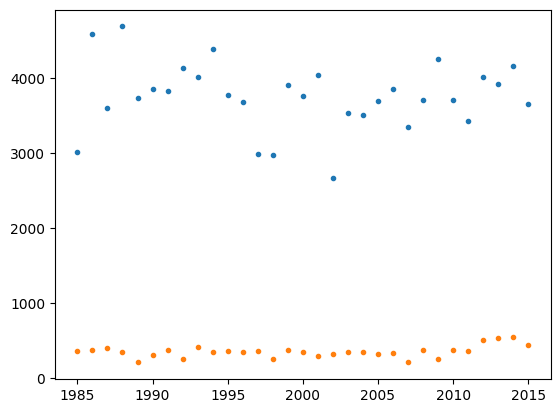

In [64]:

df_uk_greece_grouped = df_uk_greece.groupby(['year'],as_index=False).sum()
# plot(x,y,fmt) - x is years, y is cases, 
# fmt is saying to use a dot marker, with no line connecting data
# and the default colors for these markers
plt.plot(df_uk_greece_grouped['year'],
         df_uk_greece_grouped['cases_no_uk'],
         '.')
plt.plot(df_uk_greece_grouped['year'],
         df_uk_greece_grouped['cases_no_greece'],
         '.')



Pandas DataFrames also have a `plot` method, which typically uses matplotlib behind the scenes. These can create nice smart plots directly from the dataframe. In some cases, this is the easier approach to use. For example, here is a bar plot of both groups over the years. 

<AxesSubplot:xlabel='year'>

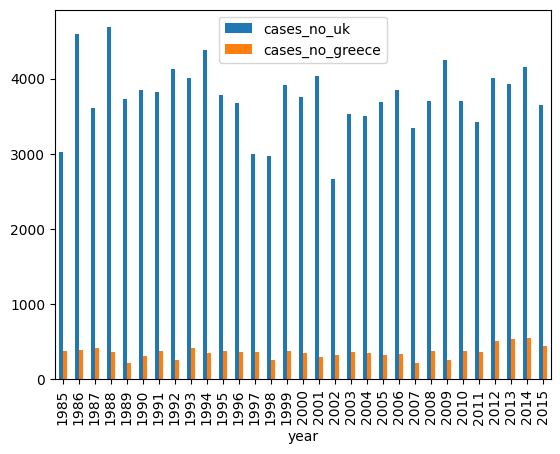

In [65]:
df_uk_greece_grouped.plot.bar(x='year',y=['cases_no_uk','cases_no_greece'])

***

## 10. Transforming variables
When we visually compare the number of cases in the UK with the number of cases in Greece, there seems to be a rather large difference between the two countries. Why would that be?

The first thing I would check is whether there might be a relationship of cases with another variable in our data frame. Why don't we start by seeing what the populations between these two countries are?


In [66]:
uk_pop = df_uk_greece_grouped['population_uk'].mean()
greece_pop = df_uk_greece_grouped['population_greece'].mean()
print("Mean population over the years in this study:")
print(f"UK: {int(uk_pop)}")
print(f"Greece: {int(greece_pop)}")

Mean population over the years in this study:
UK: 55744511
Greece: 9403957


I don't know about you, but I find all those numbers make it difficult to compare. Notice some small changes I do in this cell to make it a little easier:

In [67]:
uk_pop = np.round(uk_pop,decimals=-6)
greece_pop = np.round(greece_pop,decimals=-6)
print("Mean population over the years in this study:")
print(f"UK:     {int(uk_pop)}")
print(f"Greece: {int(greece_pop)}")

Mean population over the years in this study:
UK:     56000000
Greece: 9000000


OK! So if the UK has roughly 6 times larger population, then maybe they would have the 6 times more cases? Let's make a per capita variable and find out!

<AxesSubplot:xlabel='year'>

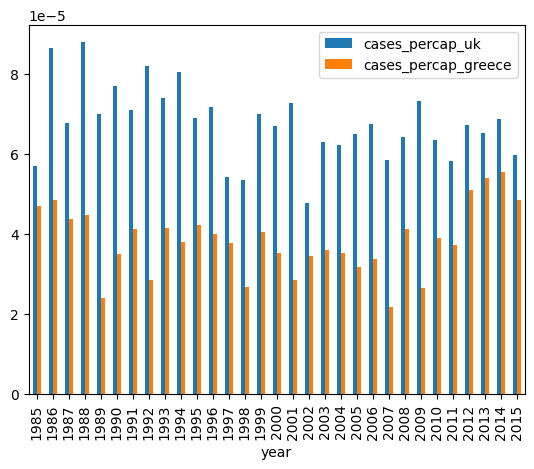

In [68]:
df_uk_greece_grouped['cases_percap_uk'] = df_uk_greece_grouped['cases_no_uk'] / df_uk_greece_grouped['population_uk']
df_uk_greece_grouped['cases_percap_greece'] = df_uk_greece_grouped['cases_no_greece'] / df_uk_greece_grouped['population_greece']
df_uk_greece_grouped.plot.bar(x='year',y=['cases_percap_uk','cases_percap_greece'])

While the number of cases per capita in the UK is still higher than Greece, the difference between the two countries is much smaller than observed without taking population into effect.

Here we have done a _transformation_ of the variable by normalizing it to another variable (in this case `population`), such that we are getting variables that are, more or less, on the same scale and we can compare between countries a bit better. 

Another transformation often used in data science is to normalize the data to make sure that the variable is scaled from 0 to 1, such that the maximum value observed was normalized to 1.


There are two steps to do this type of normalisation.

**Step 1)** Create a function of normalization 

In [69]:
def normalize(x):
    return (x)/x.max()

**Step 2)** Apply the function to the selected column 

<AxesSubplot:xlabel='year'>

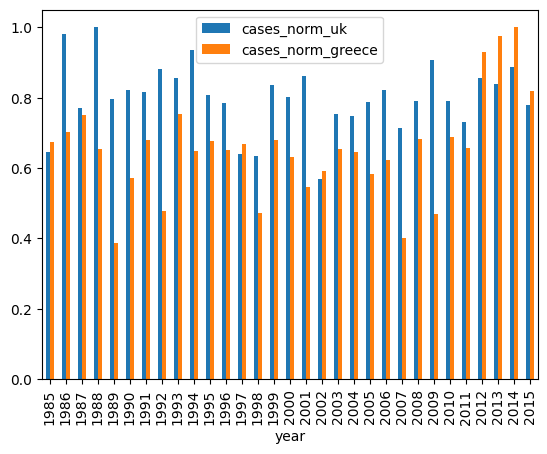

In [70]:
df_uk_greece_grouped['cases_norm_uk'] = normalize(df_uk_greece_grouped['cases_no_uk'])
df_uk_greece_grouped['cases_norm_greece'] = normalize(df_uk_greece_grouped['cases_no_greece'])
df_uk_greece_grouped.plot.bar(x='year',y=['cases_norm_uk','cases_norm_greece'])

By normalizing the values, they are now on the same scale, but direct comparisons between countries become more difficult. This is because we have normalized these variables with respect to themselves and not accounting for the other country. All we can really do is compare the trends as to when more cases were observed in one country versus another. 

A similar form of normalisation, which you may have heard about or worked with, is to transform values to a standard distribution to obtain Z scores. This transforms the variable such that the mean of the variable is 0 and the standard deviation is 1.  

We again start by creating a small helper function.

In [71]:
def zscore(x):
    return (x-x.mean())/x.std()

In [72]:
df_uk_greece_grouped['cases_zscore_uk'] = zscore(df_uk_greece_grouped['cases_no_uk'])
df_uk_greece_grouped['cases_zscore_greece'] = zscore(df_uk_greece_grouped['cases_no_greece'])
df_uk_greece_grouped.head()

,year,cases_no_uk,population_uk,gdp_for_year_usd_uk,cases_no_greece,population_greece,gdp_for_year_usd_greece,cases_percap_uk,cases_percap_greece,cases_norm_uk,cases_norm_greece,cases_zscore_uk,cases_zscore_greece
0,1985,3017.0,53006535,5871421971252,369.0,7859800.0,4.782085e+11,0.000057,0.000047,0.644245,0.674589,-1.625994,0.129147
1,1986,4587.0,53119533,7217431838172,384.0,7922600.0,5.637959e+11,0.000086,0.000048,0.979500,0.702011,1.841738,0.321012
2,1987,3604.0,53239668,8941951299228,410.0,9387400.0,7.878330e+11,0.000068,0.000044,0.769592,0.749543,-0.329459,0.653576
3,1988,4683.0,53310780,10921472785488,358.0,7996200.0,7.626128e+11,0.000088,0.000045,1.000000,0.654479,2.053778,-0.011553
4,1989,3731.0,53425129,11122617801048,212.0,8828800.0,8.708595e+11,0.000070,0.000024,0.796712,0.387569,-0.048949,-1.879032


Plotting the z scored variables will have a different look from the normalized and per capita transformations.

<AxesSubplot:xlabel='year'>

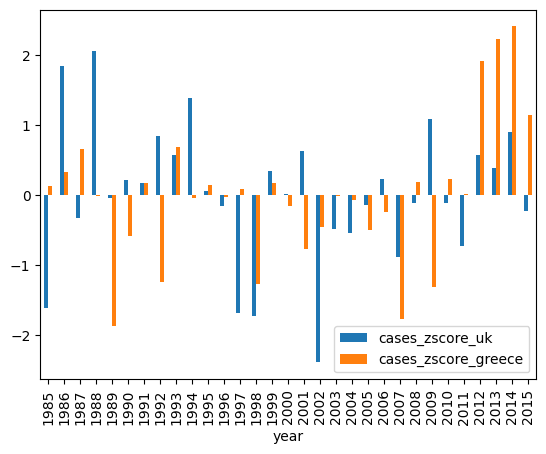

In [73]:
df_uk_greece_grouped.plot.bar(x='year',y=['cases_zscore_uk','cases_zscore_greece'])

The standardized scores over time doesn't allow for too much direct comparison between countries, but it does show general temporal trends within a country, where there were a higher number of cases in the late 80's and early 90s in the UK, and higher cases post-2011 in Greece. 

## 11. More exploration and visualisation
Now that we have done some very initial plots, we can think about more advanced plots with the data. We may want to ask ourselves what is the relationship is between cases and population as well as cases and gdp. Is that relationship different between sexes?

These sorts of questions are probably the realm of a more advanced statistical analysis, but we can start to get an idea of a relationship by doing. We will start by grouping the variables in a way that we can plot these differences.
 


In [112]:
# We are going back to the complete case data for this one. But we also
# want to include sex in the grouping so that we can compare
groupedby_country_yr_sex = df_complete.groupby(['country','year','sex'])
# Sum up population and cases over country, year, and sex
df_cases_plt = groupedby_country_yr_sex[['cases_no','population']].sum()
# Just keep the original GDP, but put it on a scale of millions of USD
df_cases_plt['gdp_millions_usd'] = groupedby_country_yr_sex[['gdp_for_year_usd']].first()/1.0e+6
# Select just the males
# Because the groupby function stores our groups as indices,
# we need a helper function to find the right indices
idx = pd.IndexSlice
males = df_cases_plt.loc[idx[:,:,'male']]
# Find all of the rows with females
females = df_cases_plt.loc[idx[:,:,'female']]
print(males.head())
print(females.head())

              cases_no  population  gdp_millions_usd
country year                                        
Albania 1985       NaN         NaN               NaN
        1986       NaN         NaN               NaN
        1987      48.0   1054500.0       2156.624900
        1988      41.0   1075700.0       2126.000000
        1989      53.0   1090100.0       2335.124988
              cases_no  population  gdp_millions_usd
country year                                        
Albania 1985       NaN         NaN               NaN
        1986       NaN         NaN               NaN
        1987      25.0    861300.0       2156.624900
        1988      22.0   1026400.0       2126.000000
        1989      15.0   1004400.0       2335.124988


We can put multiple plots together using `matplotlib.pyplot.figure()` combined with `matplotlib.pyplot.add_subplot()`.  This method takes 3 parameters. The first denotes the total number of  rows of subplots, the second parameter denotes the total number of columns of subplots, and the final parameter denotes which subplot you wish to plot in (starting left-to-right then moving down a row). Once a subplot is created, the axes of these subplots can be decorated using methods like `set_title()` or `set_xlabel()` 

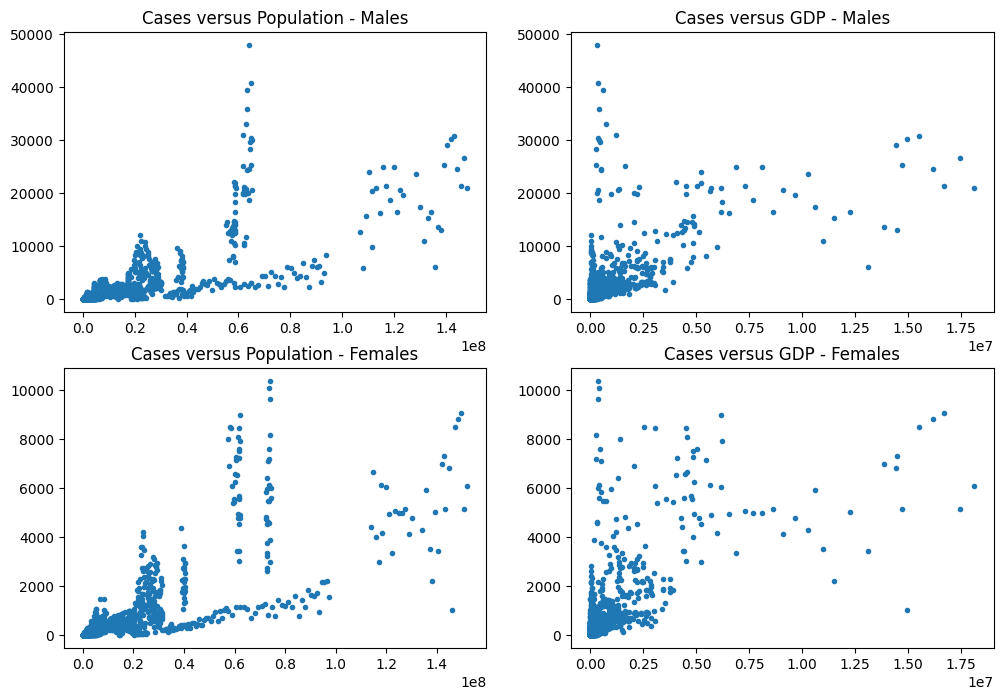

In [119]:

fig=plt.figure(figsize=(12.0, 8.0))
# Plot one Cases versus population for males
ax1= fig.add_subplot(2,2,1)
# First plot - across all countries and yearsHere we plot bar using the plt.bar() function and it is set at the ax1 which is axes1 subplot variable
ax1.set_title('Cases versus Population - Males') 
ax1.plot(males['population'],males['cases_no'],'.')

# Plot two Cases versus GDP for males
ax2= fig.add_subplot(2,2,2)
ax2.set_title('Cases versus GDP - Males')
ax2.plot(males['gdp_millions_usd'],males['cases_no'],'.')

ax3= fig.add_subplot(2,2,3)
ax3.set_title('Cases versus Population - Females') 
ax3.plot(females['population'],females['cases_no'],'.')

ax4= fig.add_subplot(2,2,4)
ax4.set_title('Cases versus GDP - Females')
ax4.plot(females['gdp_millions_usd'],females['cases_no'],'.')


Clearly, these are more complex relationships than a simple linear plot, likely involving some geography, age, and the year of the sample. Population may also be affecting the GDP value as well. 



### Exercise 7
Calculate the GDP/capita of the countries and visualise the cases according to GDP/capita as well as cased/capita versus GDP/capita for both males and females.



In [120]:
# Enter your answer for Exercise 7 here. 


### Thank you for completing this lab!

## Authors
##  Mary Tziraki and David Cash


                                                                                     

## <h3 align="center"> © Health+Bioscience IDEAS 2022. All rights reserved. <h3/>
